#Problem Statement

Stock market playing the major role in the world country's economy is completely based on the company's business and the investor's belief.

Each and every investor plays a vital role in the upliftment of their country's economy. Beginners should have a proper guidance and assurance while trading the stocks for the first time. Not having such guidance would be fatal for the investors as well as the economy as a whole.

Our aim is to provide such assistance to the beginner investors.

#Dataset
The training dataset used is from Yahoo Finance which is being used to train the models used in this project.

https://finance.yahoo.com/quote/RELIANCE.NS/history?p=RELIANCE.NS

# Python packages
### Numpy

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

__________________________________________

### Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

__________________________________________


### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like wxPython, Qt, Tkinter.

__________________________________________


### Seaborn

Seaborn is a Python data visualization library based on matplotlib. Gives more attractive graphs than matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

__________________________________________


### Scikit-Learn

Scikit-Learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.



# Importing Libraries

In [1]:
# Installing fbprophet library
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536675 sha256=e3c1d8061a93ec22e8b279cd9b74b89b8ca981880c14d8fa5df32858d6237910
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics 

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
# Read data into a DataFrame
df = pd.read_csv('RELIANCE.NS-4.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-29,2585.000000,2655.000000,2578.050049,2597.649902,2597.649902,9155684
1,2022-08-30,2614.000000,2645.250000,2576.600098,2637.949951,2637.949951,10678670
2,2022-09-01,2582.649902,2604.949951,2550.699951,2560.399902,2560.399902,9188434
3,2022-09-02,2560.399902,2575.350098,2525.699951,2530.500000,2530.500000,5999196
4,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785
...,...,...,...,...,...,...,...
120,2023-02-20,2445.000000,2449.750000,2410.100098,2414.399902,2414.399902,4078245
121,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,2434.100098,6143298
122,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,2378.899902,5087729
123,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,2367.500000,4546655


In [4]:
# Check the data size
df.shape

(125, 7)

In [5]:
# Decribe the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,2507.798793,2529.627187,2483.724016,2505.558809,2505.558809,5.491926e+06
std,105.232480,105.251869,105.935404,106.756217,106.756217,2.499416e+06
min,2311.000000,2321.000000,2293.000000,2305.899902,2305.899902,1.555270e+06
25%,2420.000000,2443.649902,2390.149902,2415.949951,2415.949951,3.713755e+06
50%,2527.000000,2548.800049,2502.000000,2524.050049,2524.050049,4.948549e+06
75%,2585.500000,2609.000000,2566.750000,2588.350098,2588.350098,6.305317e+06
max,2741.800049,2755.000000,2716.000000,2731.350098,2731.350098,1.546190e+07


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


# Exploratory Data Analysis

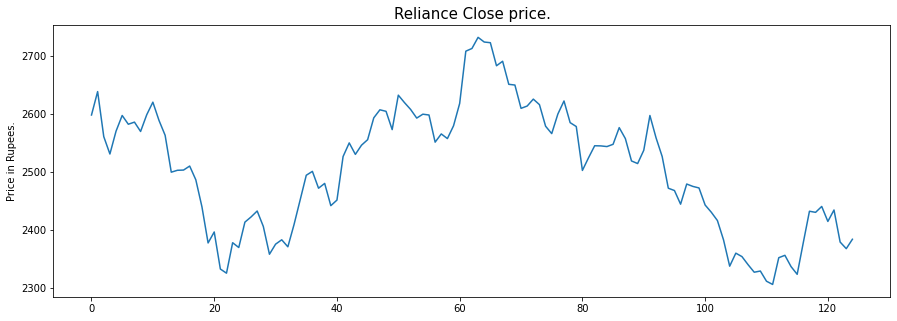

In [7]:
# Analysing how prices of the stock have moved over the period of time.
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Reliance Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()

The prices of reliance stocks are showing an volatile trend as depicted by the plot of the closing price of the stocks.

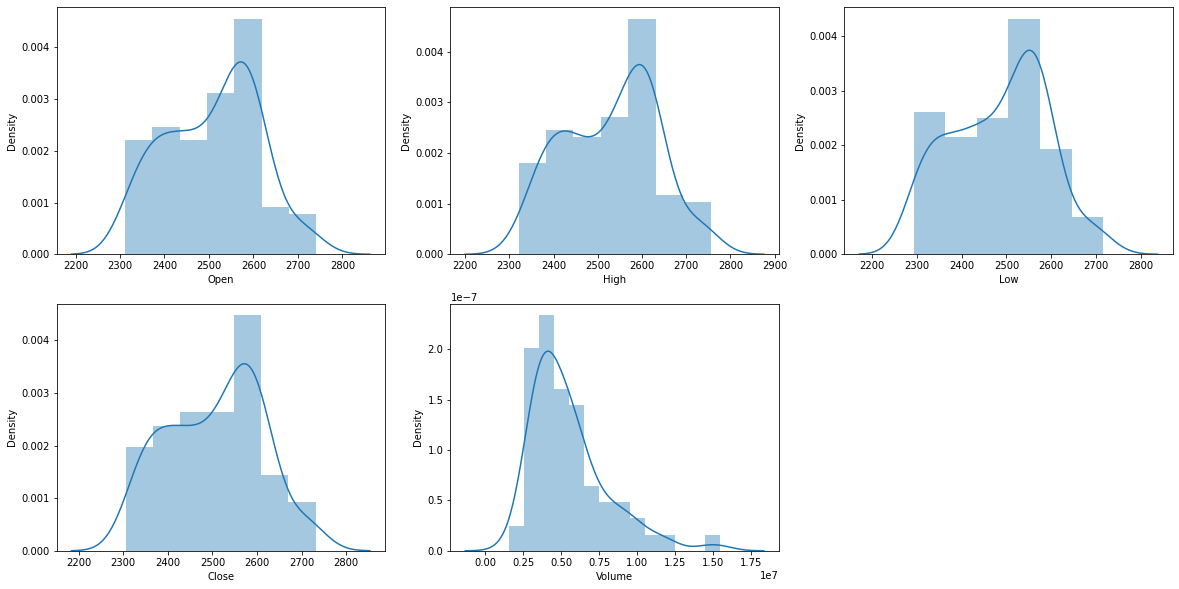

In [8]:
# Visualize the distribution for each varieble
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see a peak which means the data has varied significantly only in one region. 

And the Volume data is left-skewed.

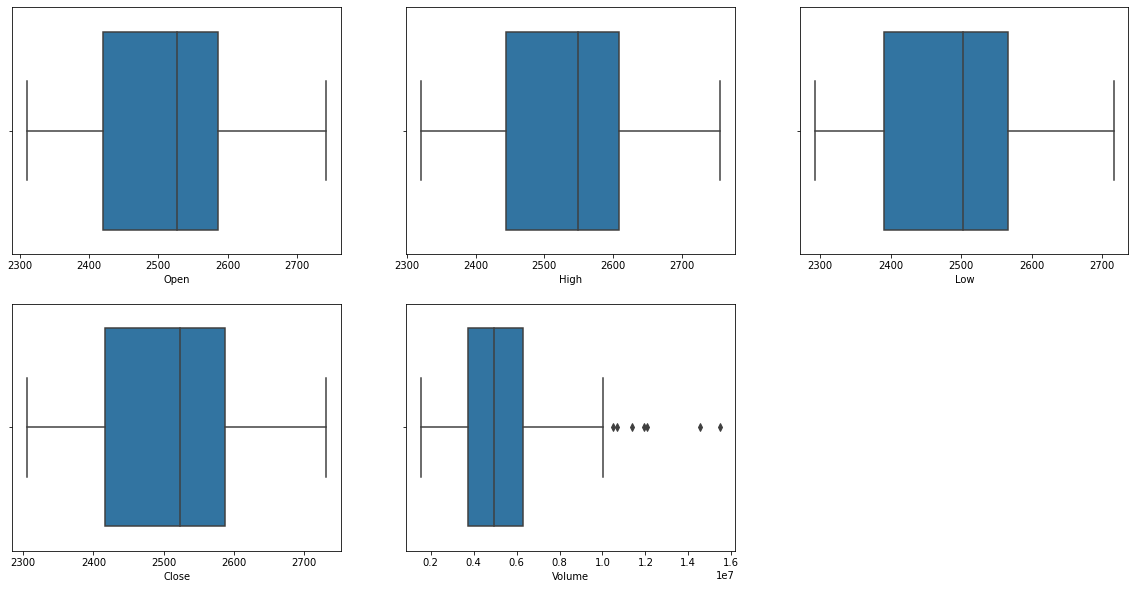

In [9]:
# Boxplot for the distribution of each variable
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [10]:
# Target feature which is a signal whether to buy or not we will train our model to predict this only. 
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. 

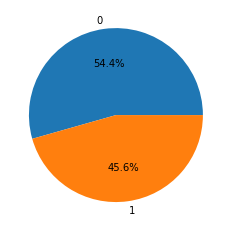

In [11]:
# Using the following pie chart to check whether the target is balanced or not.
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

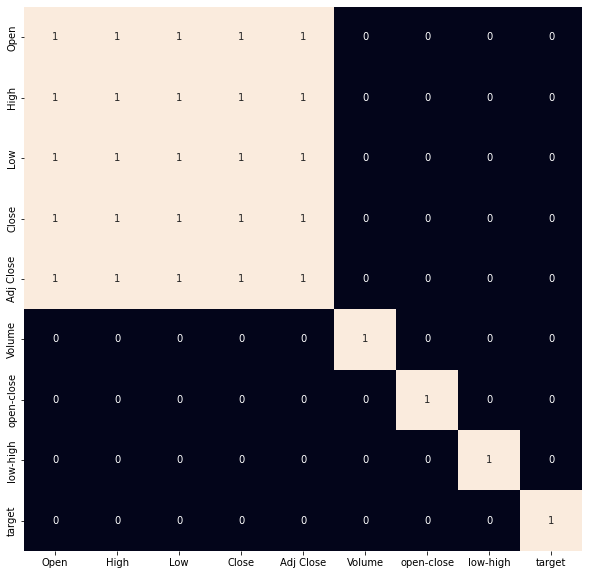

In [12]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [13]:
# Preparing the data
df = df[['Date', 'Close']]
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,y
0,2022-08-29,2597.649902
1,2022-08-30,2637.949951
2,2022-09-01,2560.399902
3,2022-09-02,2530.500000
4,2022-09-05,2569.800049
...,...,...
120,2023-02-20,2414.399902
121,2023-02-21,2434.100098
122,2023-02-22,2378.899902
123,2023-02-23,2367.500000


# Training and Testing of the stock data

In [14]:
# Splitting the data into train and test sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]

In [15]:
test_df = df[train_size:]

# Model Deployment and Evaluation

In [16]:
# Creating the Prophet model
model = Prophet()
model.fit(train_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Generating predictions for the test set
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat']][-len(test_df):]


In [18]:
# Calculating the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_df['y'], forecast['yhat'])
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape*100))


Mean Absolute Percentage Error (MAPE): 2.41%
